# Classification

In [362]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [363]:
import pandas as pd
pd.set_option('display.max_columns',200)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Classification
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import normalize,scale

In [364]:
def classification_(X,y): 
    xgbc=XGBClassifier()
    g=GaussianNB()
    b=BernoulliNB()
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    mn=MultinomialNB()
    rf=RandomForestClassifier()
    ab=AdaBoostClassifier()
    
    algos=[xgbc,g,b,k,svc,d,log,gbc,mn,rf,ab]
    algos_name=['XGBClassifier','Gaussian','Bernoulli','KNeighbors','SVC','DecisionTree','LogisticReg','GradientBoosting','MultinominalNB','RandomForest','AdaBoost']

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=101)

    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        predict=i.fit(X_train,y_train).predict(X_test)
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict))
        recall.append(recall_score(y_test,predict))
        f1.append(f1_score(y_test,predict))
      
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    
    return result.sort_values('AccuracyScore',ascending=False)

In [365]:
df1 = pd.read_csv('/content/drive/Othercomputers/My Laptop/0 Yaz Kampı/PBL2/Titanic Project with Keras and Deep Learning/train.csv')
df2 = pd.read_csv('/content/drive/Othercomputers/My Laptop/0 Yaz Kampı/PBL2/Titanic Project with Keras and Deep Learning/test.csv')

In [366]:
df1.shape, df2.shape

((891, 12), (418, 11))

In [367]:
df = df1.append(df2) # Train ve Test datasi birlestirilir

## EDA

**Data Dictionary**

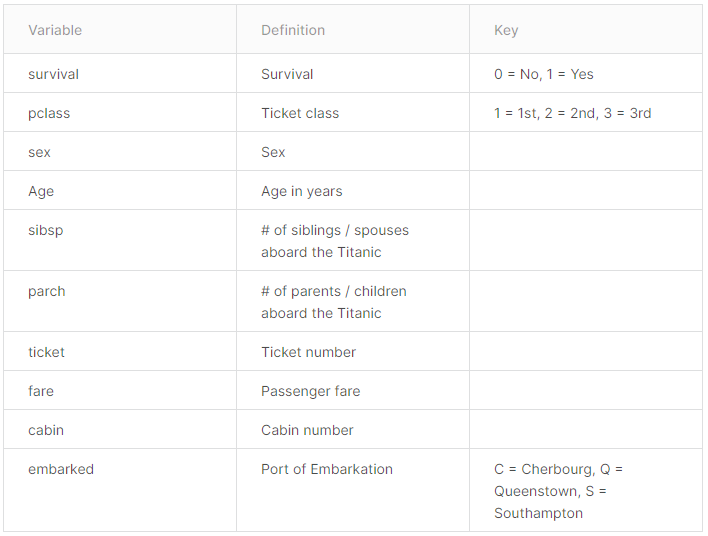

In [368]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [370]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [371]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [372]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


## Feature Engineering

In [373]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.')
df.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [374]:
df.Title.replace(['Mlle', 'Ms'], 'Miss', inplace=True)
df.Title.replace(['Dona', 'Countess', 'Lady', 'Mme'], 'Mrs', inplace=True)
df.Title.replace(['Dr', 'Major', 'Col', 'Sir', 'Rev', 'Jonkheer', 'Capt', 'Don'], 'Mr', inplace=True)
df.Title.value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [375]:
df['Family'] = df.SibSp + df.Parch + 1

In [376]:
df['Senior'] = df.Age.map(lambda x: 1 if x>70 else 0) # Yasi 70 den buyuk olanlar Senior deriz

## Missing Values

In [377]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
Family            0
Senior            0
dtype: int64

In [378]:
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G']
df['Deck']=df['Cabin'].map(lambda x: x[0] if str(x)[0] in cabin_list else np.nan)
df.Deck.value_counts()
# Ardindan bos kalan kabinler su sekilde doldurulabilir
# Aile sayisi ayni olanlar ayni kabinde olacak sekilde
# veya bilet ucretine gore

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Deck, dtype: int64

In [379]:
df.Age.fillna(df.groupby('Title')['Age'].transform('median'), inplace=True) # Yasdaki bosluklar ayni unvana sahip olanlarin yas medyanlari ile doldurulur
df.groupby('Title')['Age'].transform('median')

0      30.0
1      35.5
2      22.0
3      35.5
4      30.0
       ... 
413    30.0
414    35.5
415    30.0
416    30.0
417     4.0
Name: Age, Length: 1309, dtype: float64

In [380]:
df.Fare.fillna(df.groupby('Pclass')['Fare'].transform('mean'), inplace=True) # Fare daki bosluk ayni Pclass sahip olanlarin Fare ortalamasi ile doldurulu
df.groupby('Pclass')['Fare'].transform('mean')

0      13.302889
1      87.508992
2      13.302889
3      87.508992
4      13.302889
         ...    
413    13.302889
414    87.508992
415    13.302889
416    13.302889
417    13.302889
Name: Fare, Length: 1309, dtype: float64

In [381]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [382]:
df.Embarked.fillna('S', inplace=True) # S en cok gectiginden

In [383]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
Family            0
Senior            0
Deck           1014
dtype: int64

In [384]:
df_for_deck = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [385]:
df['Age*Class']=df['Age']*df['Pclass']

In [386]:
df['Fare_Per_Person']=df['Fare']/(df['Family'])

## Prediction

In [387]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [388]:
df_dummies

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Senior,Age*Class,Fare_Per_Person,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0.0,3,22.0,1,0,7.2500,2,0,66.0,3.625000,1,0,1,0,1,0,0,0,0,0,0,0,0
1,1.0,1,38.0,1,0,71.2833,2,0,38.0,35.641650,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1.0,3,26.0,0,0,7.9250,1,0,78.0,7.925000,0,0,1,1,0,0,0,0,0,0,0,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,35.0,26.550000,0,0,1,0,0,1,0,1,0,0,0,0,0
4,0.0,3,35.0,0,0,8.0500,1,0,105.0,8.050000,1,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,30.0,0,0,8.0500,1,0,90.0,8.050000,1,0,1,0,1,0,0,0,0,0,0,0,0
414,NaN,1,39.0,0,0,108.9000,1,0,39.0,108.900000,0,0,0,0,0,1,0,1,0,0,0,0,0
415,NaN,3,38.5,0,0,7.2500,1,0,115.5,7.250000,1,0,1,0,1,0,0,0,0,0,0,0,0
416,NaN,3,30.0,0,0,8.0500,1,0,90.0,8.050000,1,0,1,0,1,0,0,0,0,0,0,0,0


In [389]:
df_train = df_dummies[:891]
df_test = df_dummies[891:]

In [390]:
del df_test['Survived']

In [391]:
df_train.shape, df_test.shape

((891, 23), (418, 22))

In [392]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Senior,Age*Class,Fare_Per_Person,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0.0,3,22.0,1,0,7.2500,2,0,66.0,3.62500,1,0,1,0,1,0,0,0,0,0,0,0,0
1,1.0,1,38.0,1,0,71.2833,2,0,38.0,35.64165,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1.0,3,26.0,0,0,7.9250,1,0,78.0,7.92500,0,0,1,1,0,0,0,0,0,0,0,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,35.0,26.55000,0,0,1,0,0,1,0,1,0,0,0,0,0
4,0.0,3,35.0,0,0,8.0500,1,0,105.0,8.05000,1,0,1,0,1,0,0,0,0,0,0,0,0


In [393]:
classification_(df_train.drop(columns='Survived'), df_train['Survived'])

,AccuracyScore,PrecisionScore,RecallScore,f1_Score
XGBClassifier,0.832402,0.903226,0.7000,0.788732
LogisticReg,0.832402,0.890625,0.7125,0.791667
GradientBoosting,0.826816,0.888889,0.7000,0.783217
AdaBoost,0.804469,0.816901,0.7250,0.768212
RandomForest,0.798883,0.805556,0.7250,0.763158
Gaussian,0.787709,0.723404,0.8500,0.781609
Bernoulli,0.787709,0.808824,0.6875,0.743243
DecisionTree,0.765363,0.771429,0.6750,0.720000
KNeighbors,0.748603,0.777778,0.6125,0.685315
MultinominalNB,0.709497,0.705882,0.6000,0.648649


In [394]:
rf=RandomForestClassifier()
predict=rf.fit(df_train.drop(columns='Survived'), df_train.Survived).predict(df_test)

In [395]:
submission = df2[['PassengerId']] # cift koseli parantez olmasi onemli
submission['Survived'] = predict.astype(int)

In [396]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [397]:
submission.to_csv('titanic.csv', index=False) # Deck silinirse daha yuksek puan aliniyor

## Pycaret

In [399]:
#!pip install pycaret

In [400]:
#!pip install markupsafe==2.0.1

In [401]:
from pycaret.classification import *
s = setup(data=df_train , target ="Survived") # train_size=0.8 yazarsan train_test_split yapar

,Description,Value
0,session_id,5419
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(891, 23)"
5,Missing Values,False
6,Numeric Features,17
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Survived',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_str...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [402]:
best_model=compare_models(sort="AUC") #Area under the Curve # ici bos da olabilir

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8203,0.8922,0.7375,0.7635,0.7474,0.6084,0.6111,0.111
gbc,Gradient Boosting Classifier,0.8299,0.8872,0.7289,0.8040,0.7577,0.6279,0.6360,0.110
rf,Random Forest Classifier,0.8073,0.8822,0.7020,0.7606,0.7249,0.5777,0.5828,0.450
lda,Linear Discriminant Analysis,0.8268,0.8798,0.7545,0.7705,0.7605,0.6251,0.6270,0.015
lr,Logistic Regression,0.8333,0.8785,0.7413,0.7954,0.7643,0.6359,0.6395,0.379
et,Extra Trees Classifier,0.8073,0.8608,0.7154,0.7520,0.7268,0.5793,0.5846,0.448
ada,Ada Boost Classifier,0.8010,0.8563,0.7326,0.7344,0.7291,0.5725,0.5767,0.090
nb,Naive Bayes,0.4190,0.8183,0.9739,0.3843,0.5509,0.0553,0.1295,0.012
dt,Decision Tree Classifier,0.7978,0.7760,0.7063,0.7321,0.7160,0.5597,0.5624,0.014
knn,K Neighbors Classifier,0.7158,0.7514,0.5751,0.6279,0.5946,0.3783,0.3828,0.113


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5419, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [403]:
evaluate_model(best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5419, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [404]:
predictions = predict_model(best_model, data=df_test) # df_test x_test yani
predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5419, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Pclass,Age,SibSp,Parch,Fare,Family,Senior,Age*Class,Fare_Per_Person,Sex_male,...,Title_Mrs,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Label,Score
0,3,34.5,0,0,7.8292,1,0,103.5,7.829200,1,...,0,0,0,0,0,0,0,0,0.0,0.7985
1,3,47.0,1,0,7.0000,2,0,141.0,3.500000,0,...,1,0,0,0,0,0,0,0,1.0,0.5550
2,2,62.0,0,0,9.6875,1,0,124.0,9.687500,1,...,0,0,0,0,0,0,0,0,0.0,0.9577
3,3,27.0,0,0,8.6625,1,0,81.0,8.662500,1,...,0,0,0,0,0,0,0,0,0.0,0.9139
4,3,22.0,1,1,12.2875,3,0,66.0,4.095833,0,...,1,0,0,0,0,0,0,0,0.0,0.5644


## Deep Learning

In [405]:
df_train.shape

(891, 23)

In [406]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#classification da sonuncu sigmoid olursa daha isabetli olur

model.compile(loss='binary_crossentropy',optimizer="Adam",metrics=["accuracy"])
# 2 secenek varsa => loss='binary_crossentropy' yaptık,3 seçenekli bir cevap bekleseydik 
# loss='crossentropy' veya loss='category_crossentropy' kullanacaktık.

history = model.fit(df_train.drop(columns='Survived'),df_train['Survived'], validation_split=0.20, epochs=300, verbose=1)

Epoch 1/300
23/23 [==============================] - 1s 11ms/step - loss: 0.6935 - accuracy: 0.6601 - val_loss: 0.5433 - val_accuracy: 0.7709
Epoch 2/300
23/23 [==============================] - 0s 4ms/step - loss: 0.6199 - accuracy: 0.6742 - val_loss: 0.5365 - val_accuracy: 0.7598
Epoch 3/300
23/23 [==============================] - 0s 4ms/step - loss: 0.6139 - accuracy: 0.6643 - val_loss: 0.5703 - val_accuracy: 0.7933
Epoch 4/300
23/23 [==============================] - 0s 5ms/step - loss: 0.6053 - accuracy: 0.6952 - val_loss: 0.5556 - val_accuracy: 0.7821
Epoch 5/300
23/23 [==============================] - 0s 4ms/step - loss: 0.6264 - accuracy: 0.6854 - val_loss: 0.6933 - val_accuracy: 0.3799
Epoch 6/300
23/23 [==============================] - 0s 5ms/step - loss: 0.6243 - accuracy: 0.6545 - val_loss: 0.5632 - val_accuracy: 0.7151
Epoch 7/300
23/23 [==============================] - 0s 5ms/step - loss: 0.5938 - accuracy: 0.6882 - val_loss: 0.5506 - val_accuracy: 0.7542
Epoch 8/300


In [407]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 300)               6900      
                                                                 
 dense_50 (Dense)            (None, 200)               60200     
                                                                 
 dense_51 (Dense)            (None, 100)               20100     
                                                                 
 dense_52 (Dense)            (None, 50)                5050      
                                                                 
 dense_53 (Dense)            (None, 25)                1275      
                                                                 
 dense_54 (Dense)            (None, 12)                312       
                                                                 
 dense_55 (Dense)            (None, 1)                

In [408]:
pred=model.predict(df_test)

In [409]:
pred = pred.round()

In [410]:
submission = df2[['PassengerId']] # cift koseli parantez olmasi onemli
submission['Survived'] = pred.astype(int)

In [411]:
submission.to_csv('titanic.csv', index=False) # Deck silinirse daha yuksek puan aliniyor